In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
import time
import tracemalloc
import matplotlib.pyplot as plt

In [14]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
def plotting_graph(history,name):
    # Plot training results
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy with ' + name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot convergence speed (loss per epoch)
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue' )
    plt.plot(history.history['val_loss'], label='Validation Loss' , color='red')
    plt.title('Training and Validation Loss with '+ name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
#============SGD====================
# Start tracking memory
tracemalloc.start()
# Measure training time
start_time = time.time()


sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model using Mini-batch SGD
history_sgd = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Measure elapsed time and memory usage
end_time = time.time()
training_time_sgd = end_time - start_time
current, peak_sgd = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate the model
test_loss_sgd, test_acc_sgd = model.evaluate(x_test, y_test)

# Print metrics
print(f"Test Accuracy with Mini-batch SGD: {test_acc_sgd:.4f}")
print(f"Training Time: {training_time_sgd:.2f} seconds")
print(f"Peak Memory Usage: {peak_sgd / 10**6:.2f} MB")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.8157 - loss: 0.5209 - val_accuracy: 0.6896 - val_loss: 0.9527
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8273 - loss: 0.4909 - val_accuracy: 0.6989 - val_loss: 0.9629
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8427 - loss: 0.4450 - val_accuracy: 0.6944 - val_loss: 1.0231
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8494 - loss: 0.4238 - val_accuracy: 0.6894 - val_loss: 1.0433
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8620 - loss: 0.3864 - val_accuracy: 0.6912 - val_loss: 1.0977
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8738 - loss: 0.3480 - val_accuracy: 0.6903 - val_loss: 1.1495
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8853 - loss: 0.3229 - val_accuracy: 0.6894 - val_loss: 1.1916
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8863 - loss: 0.3130 - 

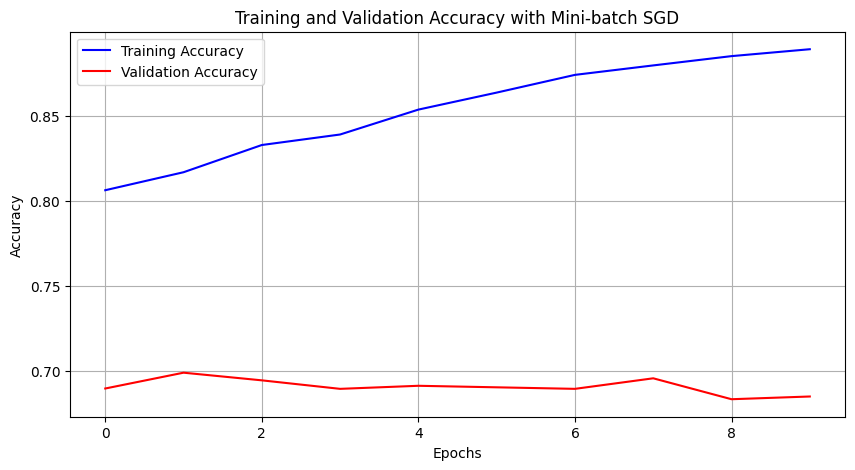

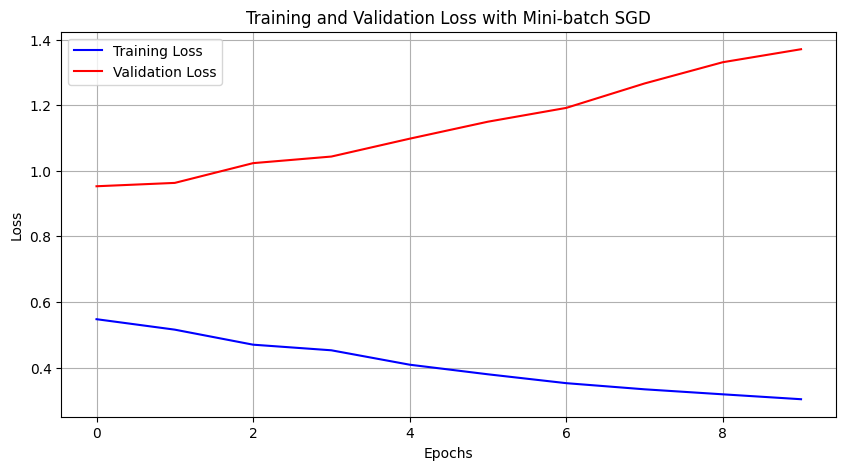

In [12]:
plotting_graph(history_sgd,"Mini-batch SGD")

In [16]:
# ==================Adam optimizer==================

# Start tracking memory and time
tracemalloc.start()
start_time = time.time()


adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


end_time = time.time()
training_time_adam = end_time - start_time
current, peak_adam = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate the model
test_loss_adam, test_acc_adam = model.evaluate(x_test, y_test)

# Print metrics
print(f"Test Accuracy with Adam: {test_acc_adam:.4f}")
print(f"Training Time: {training_time_adam:.2f} seconds")
print(f"Peak Memory Usage: {peak_adam / 10**6:.2f} MB")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.3337 - loss: 1.8012 - val_accuracy: 0.5383 - val_loss: 1.2927
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5571 - loss: 1.2396 - val_accuracy: 0.6073 - val_loss: 1.1157
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6270 - loss: 1.0609 - val_accuracy: 0.6407 - val_loss: 1.0174
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.6687 - loss: 0.9481 - val_accuracy: 0.6737 - val_loss: 0.9395
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6909 - loss: 0.8807 - val_accuracy: 0.6873 - val_loss: 0.9067
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.7164 - loss: 0.8150 - val_accuracy: 0.6907 - val_loss: 0.8864
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.7324 - loss: 0.7629 - val_accuracy: 0.7080 - val_loss: 0.8350
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.7484 - loss: 0.7169 - 

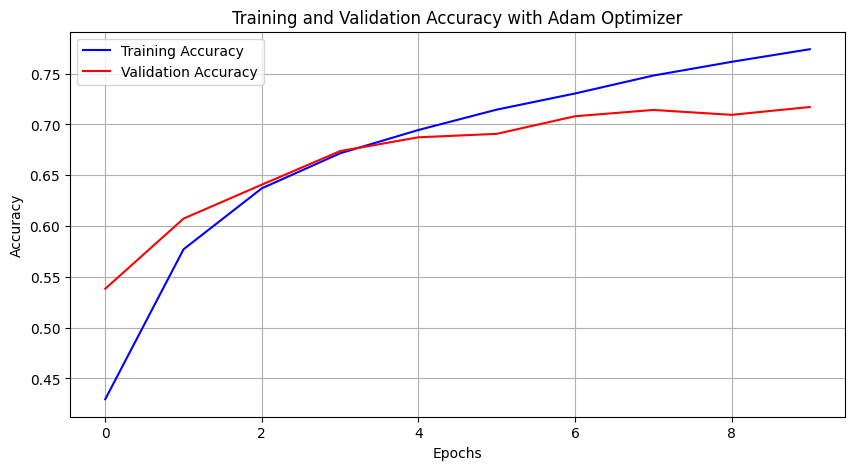

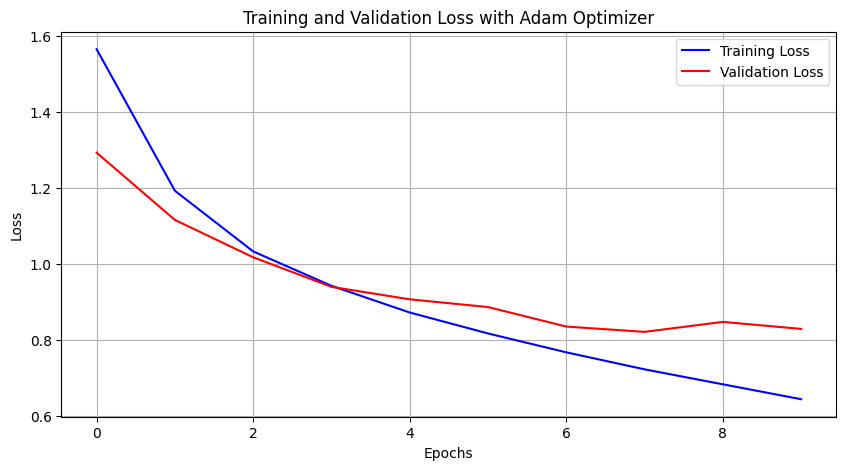

In [17]:
plotting_graph(history_adam,"Adam Optimizer")

In [18]:
# ==================RMSprop optimizer==================

# Start tracking memory and time
tracemalloc.start()
start_time = time.time()


rmsprop_optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


end_time = time.time()
training_time_rmsprop = end_time - start_time
current, peak_rmsprop = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate the model
test_loss_rmsprop, test_acc_rmsprop = model.evaluate(x_test, y_test)

# Print metrics
print(f"Test Accuracy with RMSprop: {test_acc_rmsprop:.4f}")
print(f"Training Time: {training_time_rmsprop:.2f} seconds")
print(f"Peak Memory Usage: {peak_rmsprop / 10**6:.2f} MB")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.7678 - loss: 0.6713 - val_accuracy: 0.6296 - val_loss: 1.1621
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7816 - loss: 0.6180 - val_accuracy: 0.6211 - val_loss: 1.2850
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 54ms/step - accuracy: 0.7930 - loss: 0.5852 - val_accuracy: 0.6129 - val_loss: 1.2722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.8012 - loss: 0.5669 - val_accuracy: 0.7000 - val_loss: 0.9497
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.8121 - loss: 0.5336 - val_accuracy: 0.6710 - val_loss: 1.0751
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.8211 - loss: 0.5099 - val_accuracy: 0.6943 - val_loss: 0.9553
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8279 - loss: 0.4860 - val_accuracy: 0.6900 - val_loss: 0.9875
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.8396 - loss: 0.4551 - 

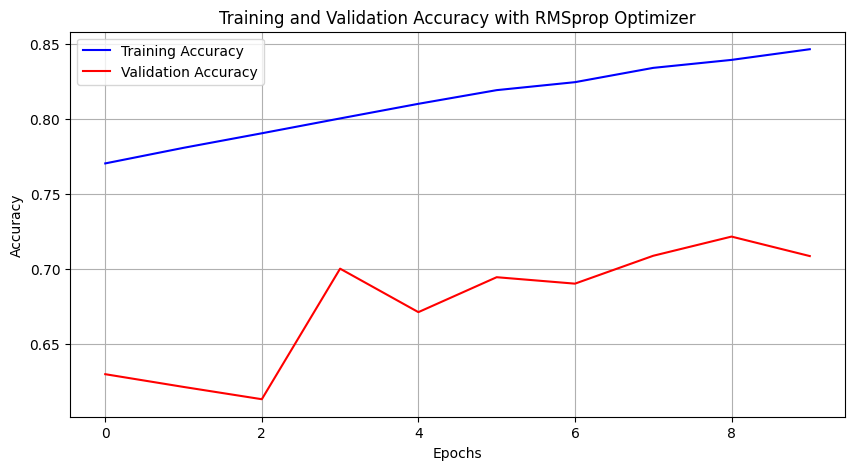

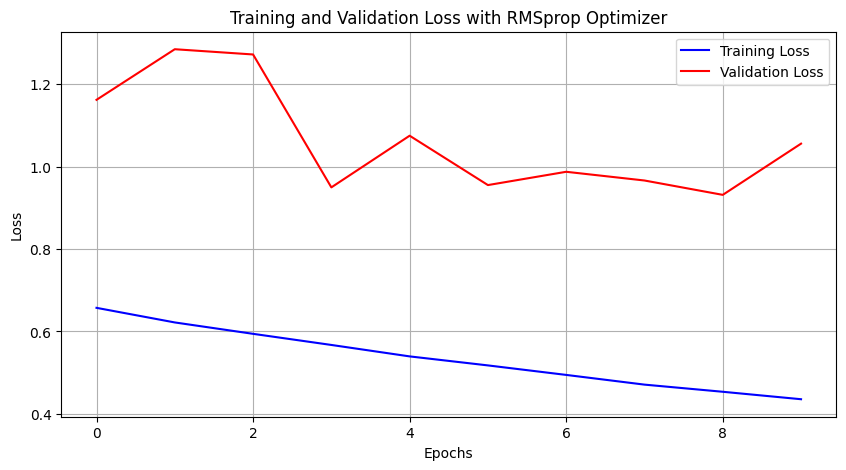

In [19]:
plotting_graph(history_rmsprop,"RMSprop Optimizer")

In [20]:
# Start tracking memory and time
tracemalloc.start()
start_time = time.time()

# Compile and train the model with Adagrad optimizer
adagrad_optimizer = Adagrad(learning_rate=0.001)
model.compile(optimizer=adagrad_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adagrad = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Stop tracking time and memory
end_time = time.time()
training_time_adagrad = end_time - start_time
current, peak_adagrad = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate the model
test_loss_adagrad, test_acc_adagrad = model.evaluate(x_test, y_test)

# Print metrics
print(f"Test Accuracy with Adagrad: {test_acc_adagrad:.4f}")
print(f"Training Time: {training_time_adagrad:.2f} seconds")
print(f"Peak Memory Usage: {peak_adagrad / 10**6:.2f} MB")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8969 - loss: 0.3055 - val_accuracy: 0.7428 - val_loss: 0.8893
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9107 - loss: 0.2713 - val_accuracy: 0.7440 - val_loss: 0.8912
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9145 - loss: 0.2637 - val_accuracy: 0.7455 - val_loss: 0.8961
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9146 - loss: 0.2660 - val_accuracy: 0.7462 - val_loss: 0.9005
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9156 - loss: 0.2619 - val_accuracy: 0.7448 - val_loss: 0.9042
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9157 - loss: 0.2561 - val_accuracy: 0.7457 - val_loss: 0.9062
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9162 - loss: 0.2584 - val_accuracy: 0.7451 - val_loss: 0.9092
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9169 - loss: 0.2532 - 

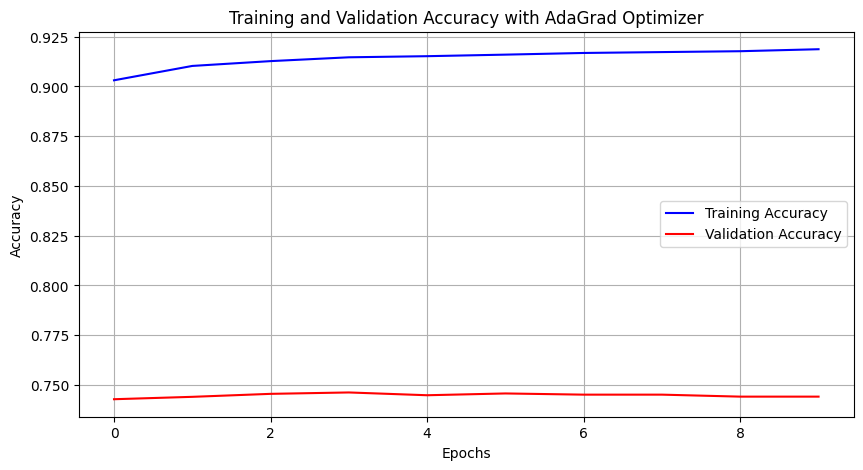

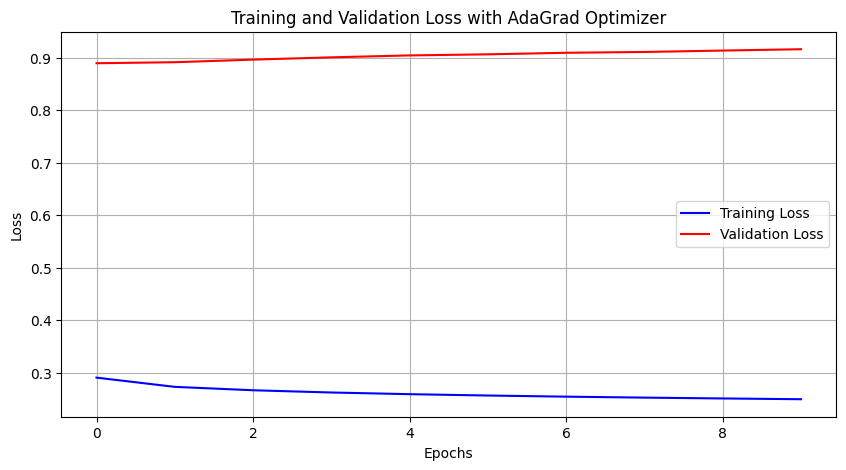

In [21]:
plotting_graph(history_adagrad, 'AdaGrad Optimizer')

In [46]:
#=============== Comaprision graphs==============

import matplotlib.pyplot as plt

# Function to plot accuracy comparison
def plot_accuracies(accuracies, optimizer_names):
    #print(f"Accuracies: {accuracies}")
    plt.figure(figsize=(8, 5))
    plt.bar(optimizer_names, accuracies, color=['red', 'blue', 'green', 'purple'])
    plt.title('Accuracy Comparison of Optimizers')
    plt.xlabel('Optimizers')
    plt.ylabel('Accuracy')
    plt.ylim(0.65, 0.75)  # Adjusted y-axis limits to fit your values
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Function to plot time and RAM comparison
def plot_time_and_ram(training_times, ram_usages, optimizer_names):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(optimizer_names, training_times, color='magenta', alpha=0.6, label='Training Time (minutes)')
    ax1.set_xlabel('Optimizers')
    ax1.set_ylabel('Training Time (minutes)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    ax2 = ax1.twinx()
    ax2.plot(optimizer_names, ram_usages, color='brown', marker='o', label='RAM Usage (MB)')
    ax2.set_ylabel('RAM Usage (MB)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    plt.title('Training Time and RAM Usage Comparison')
    fig.tight_layout()
    plt.show()

# Function to plot accuracies and losses per epoch
def plot_epoch_metrics(histories, optimizer_names):
    colors = ['red', 'blue', 'green', 'purple']

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    for idx, history in enumerate(histories):
        plt.plot(history.history['accuracy'], color=colors[idx], linestyle='-', label=f'{optimizer_names[idx]} Training Accuracy')
        plt.plot(history.history['val_accuracy'], color=colors[idx], linestyle='--', label=f'{optimizer_names[idx]} Validation Accuracy')
    plt.title('Training and Validation Accuracy Across Optimizers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 6))
    for idx, history in enumerate(histories):
        plt.plot(history.history['loss'], color=colors[idx], linestyle='-', label=f'{optimizer_names[idx]} Training Loss')
        plt.plot(history.history['val_loss'], color=colors[idx], linestyle='--', label=f'{optimizer_names[idx]} Validation Loss')
    plt.title('Training and Validation Loss Across Optimizers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


In [30]:
optimizer_names = ['Mini-batch SGD', 'Adam', 'RMSprop', 'Adagrad']
accuracies = [test_acc_sgd, test_acc_adam, test_acc_rmsprop, test_acc_adagrad]
training_times = [training_time_sgd / 60, training_time_adam / 60, training_time_rmsprop / 60, training_time_adagrad / 60]
ram_usages = [peak_sgd / 10**6, peak_adam / 10**6, peak_rmsprop / 10**6, peak_adagrad / 10**6]
histories = [history_sgd, history_adam, history_rmsprop, history_adagrad]


Accuracies: [0.6848999857902527, 0.7171000242233276, 0.7084000110626221, 0.7440999746322632]
Optimizer Names: ['Mini-batch SGD', 'Adam', 'RMSprop', 'Adagrad']


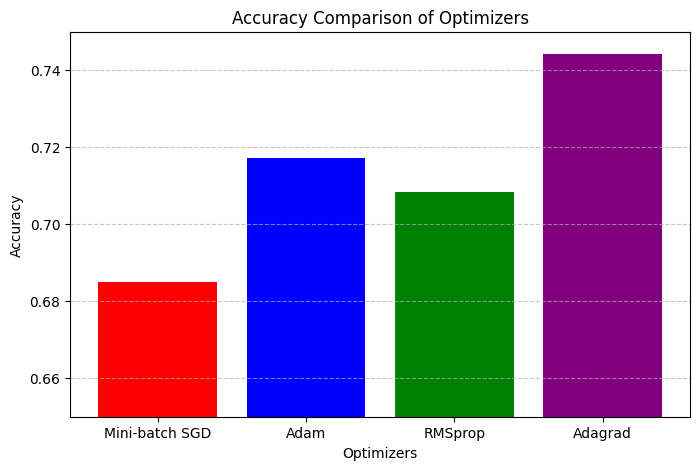

In [36]:
plot_accuracies(accuracies, optimizer_names)

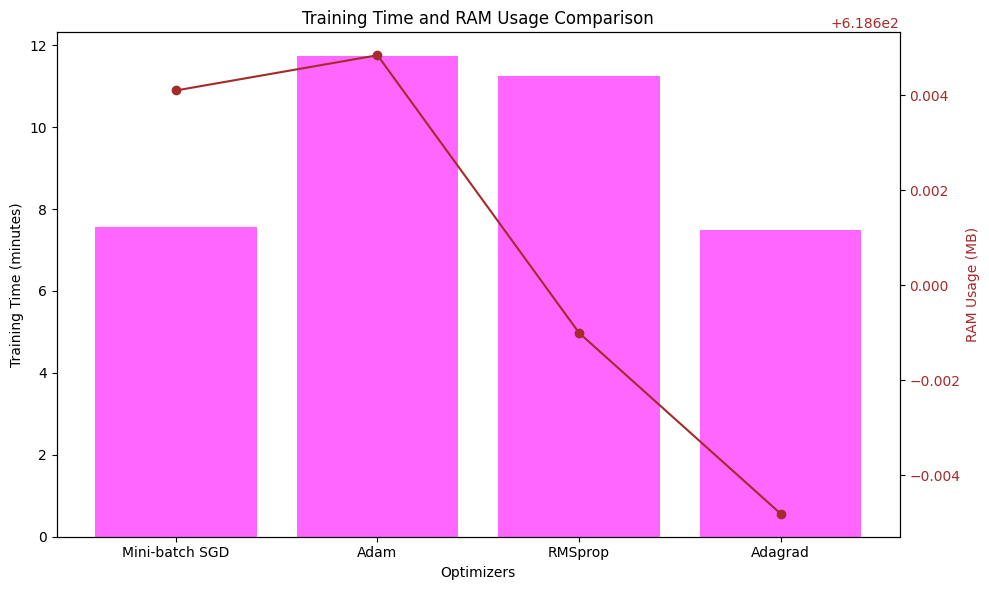

In [47]:
plot_time_and_ram(training_times, ram_usages, optimizer_names)


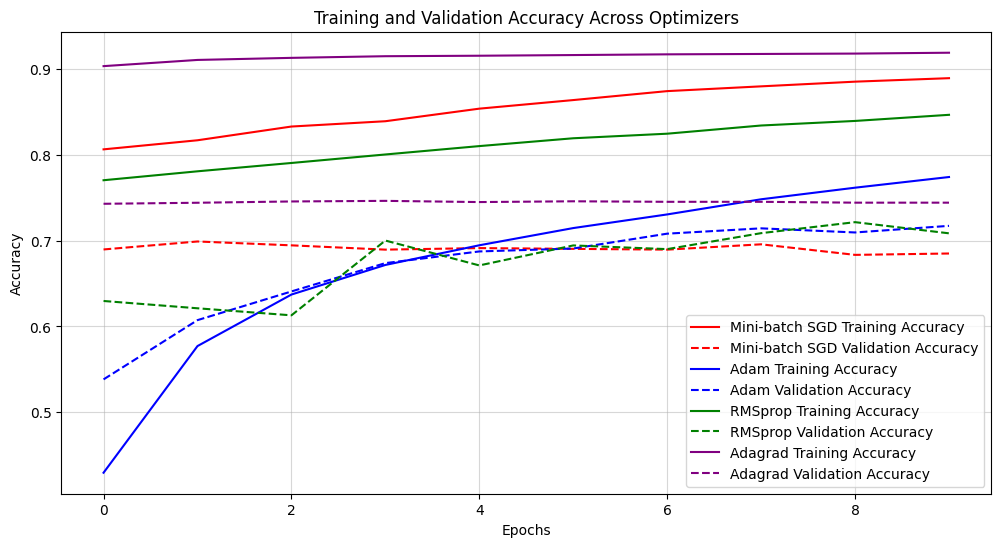

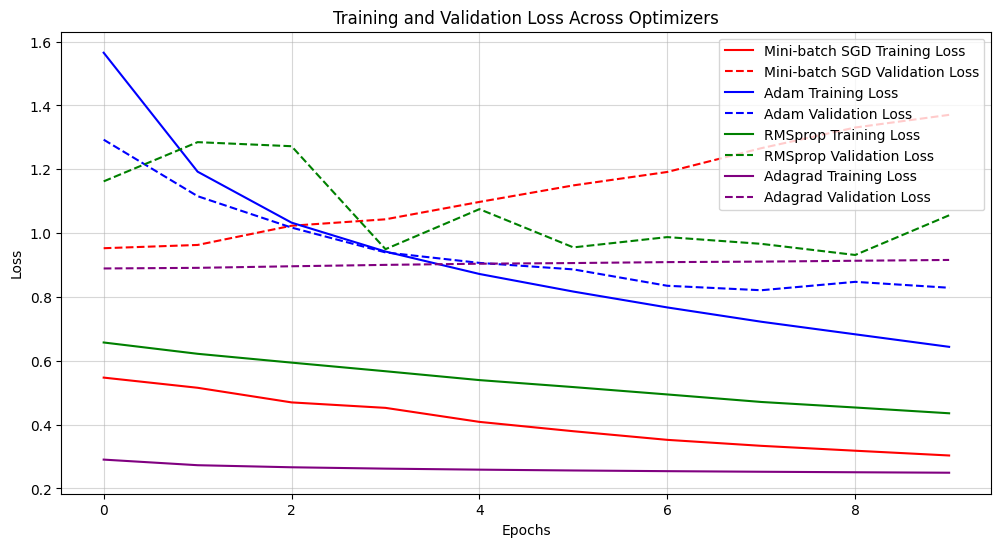

In [34]:
plot_epoch_metrics(histories, optimizer_names)
